In [24]:
from tensorflow.keras import optimizers, datasets, layers
import tensorflow as tf

In [25]:
((train_x , train_y) , (test_x , test_y)) = datasets.mnist.load_data()
train_x.shape

(60000, 28, 28)

In [26]:
train_x=train_x.reshape(60000,28,28,1)
test_x=test_x.reshape(10000,28,28,1)

In [27]:
train_x.shape

(60000, 28, 28, 1)

In [28]:
print(train_x[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [29]:
train_x=train_x.astype('float32')/255
test_x=test_x.astype('float32')/255

In [30]:
print(train_x[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [31]:
print(train_y[0])

5


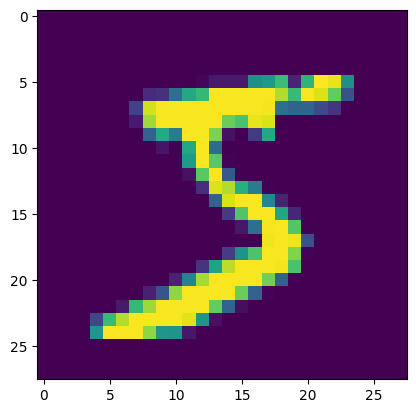

In [32]:
import matplotlib.pyplot as plt
plt.imshow(train_x[0])

In [33]:
train_y=tf.keras.utils.to_categorical(train_y)
test_y=tf.keras.utils.to_categorical(test_y)

In [34]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [35]:
train_x.shape

(60000, 28, 28, 1)

In [39]:
import tensorflow as tf
from tensorflow.keras import activations , Sequential

In [40]:
model = Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=5 , strides=1 , padding = 'same', activation= tf.nn.relu ,input_shape=(28,28,1)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2) , padding = 'valid'))

In [43]:
model.add(layers.Conv2D(filters=64,kernel_size=3 , strides=(1,1) , padding = 'same', activation= tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2) , padding = 'valid'))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x=train_x, y=train_y, batch_size=128, epochs=10, validation_data=(test_x, test_y))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 167ms/step - accuracy: 0.9972 - loss: 0.0081 - val_accuracy: 0.9892 - val_loss: 0.0370
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 170ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.9912 - val_loss: 0.0334
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 165ms/step - accuracy: 0.9979 - loss: 0.0058 - val_accuracy: 0.9914 - val_loss: 0.0293
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.9907 - val_loss: 0.0364
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 169ms/step - accuracy: 0.9988 - loss: 0.0041 - val_accuracy: 0.9912 - val_loss: 0.0355
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 166ms/step - accuracy: 0.9988 - loss: 0.0036 - val_accuracy: 0.9914 - val_loss: 0.0337
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9907 - val_loss: 0.0390
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9987 - loss: 0

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,266,464 (4.83 MB)

 Trainable params: 422,154 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 844,310 (3.22 MB)

KeyError: 'val_accuracy'

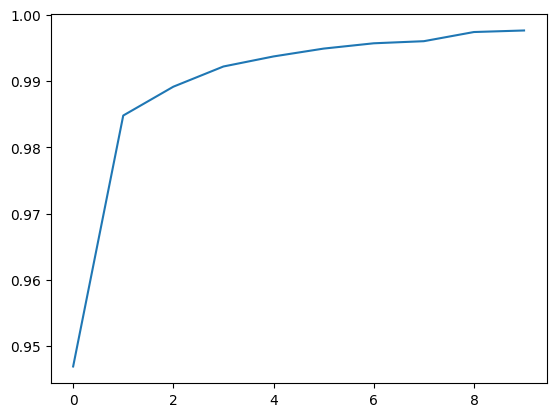

In [47]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

KeyError: 'val_loss'

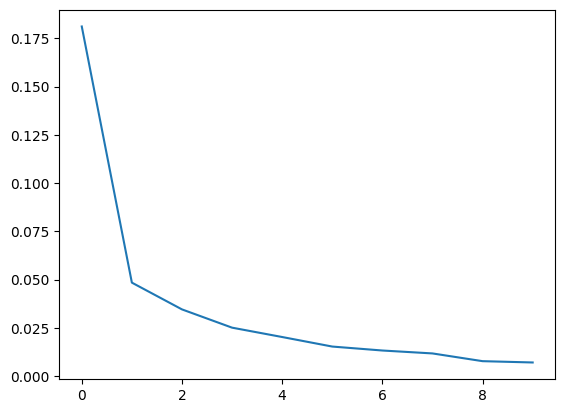

In [48]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')